In [1]:
#| echo: false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: you can ignore this code, it's just for data preparation

# Imports the age guessing data from the database,
# restructures it and merges it with the game data.

dt_raw = pd.read_json("https://get-uktfaces-data-suq3dizvtq-uc.a.run.app")
dt = pd.melt(
    dt_raw.reset_index(names="FileId"), 
    id_vars=["FileId"],
    var_name="UserId",
    value_name="Data"
)
dt_mesurements = pd.json_normalize(dt['Data']).rename(columns=lambda x: x[0].upper() + x[1:])
dt = pd.concat([dt.drop(columns=["Data"]), dt_mesurements], axis=1)

game = pd.read_json("https://get-uktfaces-game-suq3dizvtq-uc.a.run.app").rename(columns={"id": "FileId", "age": "Age", "race_f": "Race", "gender": "Gender"})
dt = dt.merge(game, on="FileId", how="left")[["FileId", "UserId", "Guess", "Age", "Race", "Gender", "Position", "TimeStart", "TimeEnd"]].copy()

# Descriptive Statistics

[Open in Colab](https://colab.research.google.com/github/febse/stat2024/blob/main/02-Descriptive-Statistics.ipynb)

## Introduction

In this section we will learn the basic summaries of data and how to compute them using Python. We will also learn how to visualize data using histograms, box plots, and scatter plots.

## The Arithmetic Mean

The arithmetic mean is a measure of central tendency that is calculated as the sum of the values divided by the number of values. It is the most common measure of central tendency and is often referred to simply as the "average".

For a collection of $n$ values $x_1, x_2, \ldots, x_n$, the arithmetic mean is calculated as:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Note that this notation is just a short way of writing:

$$
\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

:::{#ex-mean}
## The Arithmetic Mean


For a collection of three values $n = 3$,  $x_1 = 5$, $x_2 = 4$, and $x_3 = 6$, the arithmetic mean is:

$$
\bar{x} = \frac{5 + 4 + 6}{3} = 5
$$

:::

In [2]:
# Calculating the average in a numpy array (a special list of values)

np.array([5, 4, 6]).mean()

5.0

## The Average Guess Error

As we have seen, it is hard to guess the exact age of a person. In our example we happen to know the age of the persons at the time the images were taken and so we can calculate the error of the guesses. The error is the difference between the guess and the actual age. We can calculate the mean error and the median error.

$$
\text{Guess Error} = \text{Guessed Age} - \text{Actual Age}
$$

The guesses are contained in the `Guess` column and the actual ages in the `Age` column. The error is calculated as `Guess - Age`. We will create a new column in the DataFrame called `GuessError` to store the errors.

In [3]:
# What was the average guess error in the dataset? First let's calculate the guess error for each row.

dt["GuessError"] = dt["Guess"] - dt["Age"]
dt[['Guess', 'Age', 'GuessError']].head()

,Guess,Age,GuessError
0,58,72,-14
1,70,62,8
2,57,75,-18
3,19,21,-2
4,30,28,2


In [4]:

# There are multiple ways to calculate the average age of the users in the dataset. We will use two methods: the mean function and the mean method.

## Using the mean method

print(dt["GuessError"].mean())

## Using the mean function

np.mean(dt["GuessError"])


1.665266106442577


1.665266106442577

In [5]:
# Here we will print the average guess error and round it to two decimal places

print("The average guess errors in the images was", dt["GuessError"].mean().round(2), "years.")

The average guess errors in the images was 1.67 years.


:::{#ex-mean-2}
## The Average Guess Duration

- Create a new column in the dataset `dt` called `GD` (short for "Guess Duration") that contains the time (in _seconds_) it took for each participant to guess the age of the person in the photo. 
- Calculate the arithmetic mean of the guess duration. Use the `TimeEnd` and `TimeStart` columns to calculate the guess duration and keep in mind that `TimeStart` and `TimeEnd` are measured in milliseconds.

:::

In [6]:
# Write your code here and run it



## The Median and Mode

For a collection of values $x_1, x_2, \ldots, x_n$, the **median** is the middle value when the values are sorted in ascending order. If the number of values is odd, the median is the middle value. If the number of values is even, the median is the average of the two middle values. It is a measure of central tendency that is less sensitive to extreme observations than the mean.

The **mode** is the value that appears most frequently in a collection of values. A collection of values can have no mode, one mode, or multiple modes.
The mode is generally only useful for categorical data (such as gender, employment status, etc.) and not for continuous data.

:::{#exm-median}
## Computing the Median

Let's compute the median for $x = (1, 5, 3, 4, 2)$. First, we sort the values in ascending order: $(1, 2, 3, 4, 5)$. Since the number of values is odd, the median is the middle value, which is $3$. _Approximately_ half of the values are less than the median and half are greater than the median. In this example $1$ and $2$ are less than the median and $4$ and $5$ are greater than the median (so not _exactly_ 50 percent).

Let's compute the median for $x = (7, 5, 12, 4, 2, 1.2)$. First, we sort the values in ascending order: $(1.2, 2, 4, 5, 7, 12)$. Since the number of values is even, the median is the average of the two middle values, which are $4$ and $5$. Therefore, the median is $(4 + 5) / 2 = 4.5$. Again, _approximately_ half of the values are less than the median and half are greater than the median.

:::



In [7]:
# The same example as above but using the median function (there is no median method)

x = np.array([1, 5, 3, 4, 2])
np.median(x)

3.0

In [8]:
y = np.array([1.2, 2, 4, 5, 7, 12])
np.median(y)

4.5

In [9]:
# The median of the guess error

np.median(dt["GuessError"])

1.0

:::{#exr-median}
## Computing the Median

Compute the median for the following collections of values: $z = (2.1, 5, 8, 1, 2, 3)$ first on a piece of paper and then using Python.

:::

In [10]:
# Write your code here and run it



## The Range of the Data

Reporting the average of a collection of values is useful, but it only tells a part of the story. We also want to know how different the values in the collection are. One way to measure this is to describe the variation of the data. There are multiple ways to measure the variation of a dataset, here we will start with the percentiles and the range.

- The smallest value in the dataset is called the **minimum** (or the 0th percentile, 0th quartile, or 0th decile).
- The largest value in the dataset is called the **maximum** (or the 100th percentile, 100th quartile, or 100th decile).

- The **range** of the data is the pair of the minimum and the maximum. (Sometime the range is understood as the difference between the maximum and the minimum.)
- The **span** of the data is the difference between the maximum and the minimum.
- The difference between the 75th percentile and the 25th percentile is called the **interquartile range** (IQR) and it is a measure of the spread of the middle 50% of the data.

## The Quartiles

- The **first quartile** (Q1) is the value below which (approx.) 25% of the data fall.
- The **second quartile** (Q2) is the value below which (approx.) 50% of the data fall. The second quartile is also known as the median.
- The **third quartile** (Q3) is the value below which (approx.) 75% of the data fall.

Instead of four parts (quartiles), we can divide the data into ten parts (deciles) or one hundred parts (percentiles) or into any number of parts (quantiles).

- The **first decile** (D1) is the value below which (approx.) 10% of the data fall.
- The **second decile** (D2) is the value below which (approx.) 20% of the data fall.
...
- The **ninth decile** (D9) is the value below which (approx.) 90% of the data fall.

- The **first percentile** (P1) is the value below which (approx.) 1% of the data fall.
- The **second percentile** (P2) is the value below which (approx.) 2% of the data fall.
...
- The **ninetieth percentile** (P90) is the value below which (approx.) 90% of the data fall.
- The **ninety-ninth percentile** (P99) is the value below which (approx.) 99% of the data fall.



In [11]:
# We can compute the quartiles of the guesses of the users in the dataset using the quantile method
# and the numpy quantile function.

print(dt["GuessError"].quantile([0.25, 0.5, 0.75]))

np.quantile(dt["GuessError"], [0.25, 0.5, 0.75])


0.25   -3.0
0.50    1.0
0.75    7.0
Name: GuessError, dtype: float64


array([-3.,  1.,  7.])

In [12]:
# A quick way to get an overview of the data is to use the describe method

dt["GuessError"].describe()

count    714.000000
mean       1.665266
std        9.569631
min      -29.000000
25%       -3.000000
50%        1.000000
75%        7.000000
max       60.000000
Name: GuessError, dtype: float64

## The Boxplot

The boxplot is a visualization of the quartiles of a distribution. It shows the minimum and maximum values, the first quartile, the median, and the third quartile. The boxplot is a useful tool for identifying outliers in the data and for comparing distributions.

The boxplot is constructed as follows:

1. A box is drawn from the first quartile to the third quartile. (How many values are in the box?)
2. A line is drawn inside the box at the median.
3. Lines (whiskers) are drawn from the box to the minimum and maximum values that are not outliers.
4. Outliers are plotted as individual points.

By default, values that are more than 1.5 times the IQR range from the first or third quartile are shown as outliers.

:::{.callout-warning}
## Outliers and Errors

The term "outlier" is often used to describe values that are unusual or unexpected. Outliers can result from errors in the data collection process, from unusual events, or from the _natural variability of the data_. Identifying outliers is very important because they can help you find errors in your data (perhaps wrong data entry, wrong programming logic, etc.). However, you should never think of outliers as "bad" data, unless you can indeed identify the source of the error. You cannot simply remove outliers from your data without understanding why they are there.

Later on we will see that whether or not an observation looks unusual (an outlier) or not only makes sense in the context of a 
specific statistical model.

:::


<Axes: xlabel='GuessError'>

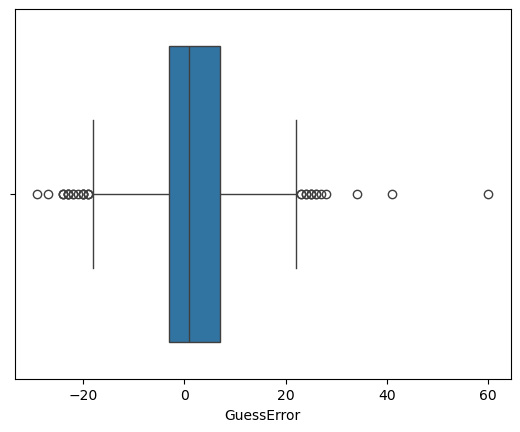

In [13]:
# One way to create a boxplot easily is to use the seaborn library (it is imported as sns at the top of this notebook).

sns.boxplot(data=dt, x="GuessError")

<Axes: xlabel='GuessError', ylabel='Gender'>

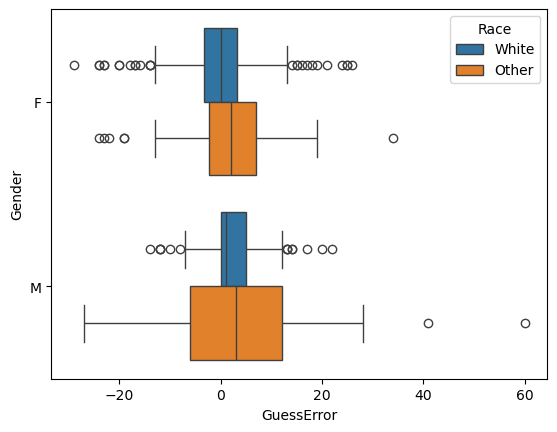

In [14]:
sns.boxplot(data=dt, x="GuessError", y="Gender", hue="Race")

:::{#exr-quantiles}
## The Quartiles and the Percentiles

You have already create a column `GD` (guess duration) in the previous exercise. Now use this column to solve the following tasks:

- What was the longest guess duration? (Use the `max` method of the new column.)
- What was the shortest guess duration? (Use the `min` method of the new column.)
- Use the quantile method of the new column to calculate the first quartile, the median, and the third quartile. Write a short sentence explaining the meaning of these values.
- What was the guess duration such that 90% of the guesses took less than this duration? (Use the `quantile` method of the new column.)
- What was the guess duration such that 20% took more than this duration? (Use the `quantile` method of the new column.)
- Use a logical operation to find the number of guesses that took under a second. (Hint: The `GD` column is in seconds.)
- Draw a boxplot of the guess durations.
- Draw a boxplot of the guess duration by `Sex`. Did the participants tend to take longer in guessing the age of males or females?
- Draw a boxplot of the guess duration by `Sex` and `Race`. Did the participants tend to take longer in guessing the age of non-white women?
:::

In [15]:
# Write your code here



## Bar Charts

You are probably already familiar with bar charts as these are pervasive in the media. Bar charts are commonly used to visualize the frequency (the number of observations) of different categories. The height of the bars represents the frequency of each category.

<Axes: xlabel='count', ylabel='Gender'>

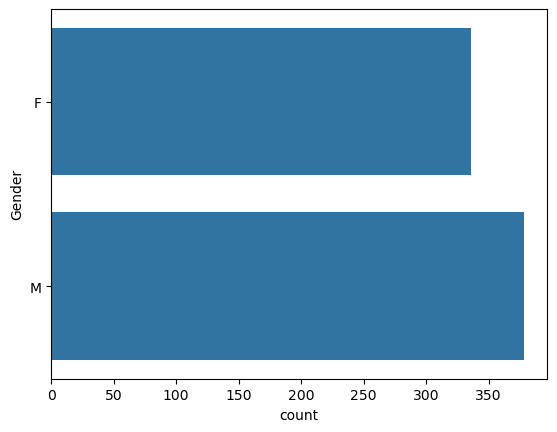

In [16]:
# You can create a bar chart using the countplot function from the seaborn library.

sns.countplot(dt, y = "Gender")

In [17]:
# Exercise: create a bar chart for the frequency of `Race` in the dataset



## The Histogram

In the previous block we encountered bar charts as a way to visualize the frequency of different categories. The histogram is a similar visualization, but it is used to visualize the distribution of a continuous variable. The problem it solves is that we cannot visualize the frequency of each value of a continuous variable because there are infinitely many values. Instead, we group the values into intervals (bins) and visualize the frequency of each bin. The number of bins is a parameter that can be adjusted to show more or less detail. Usually you will have to experiment with the number of bins to find a reasonable visualization.



Text(0, 0.5, 'Count')

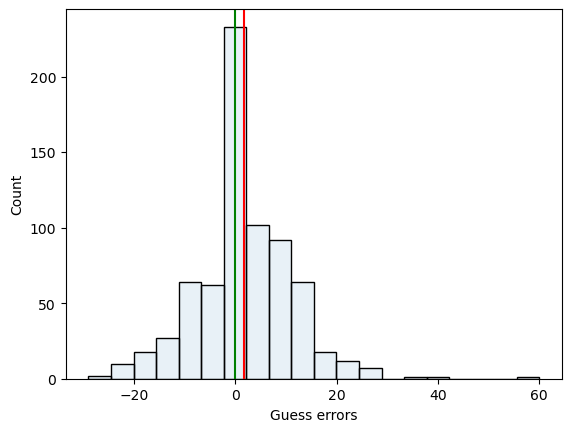

In [20]:
# Plot a histogram of the guess errors
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn histogram

sns.histplot(dt, x = "GuessError", bins=20, alpha=0.1)

# Draws a vertical line at x=0 (no guess error)
plt.axvline(x=0, color='green')

# Draws a vertical line at the mean guess error
plt.axvline(x=dt["GuessError"].mean(), color='red')

plt.xlabel("Guess errors")
plt.ylabel("Count")

:::{#exr-histogram}

## A Histogram of the Guess Durations

- Create a histogram of the guess durations, set the labels of the x-axis to "Guess Duration".
- Does the distribution of the guess durations look symmetric?

:::

In [ ]:
# Write your code here and run it


## Of Variability and Variance

Until now we have discussed the span of the data and the inter-quartile range as measures of variability. Another measure of variability is the variance.

:::{#def-variance}
## The Sample Variance and Sample Standard Deviation

The variance of a collection of $n$ values $x_1, x_2, \ldots, x_n$ is calculated as the average (with a correction factor) of the squared differences between each value and the mean:

$$
\text{S}^2_{x} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This is a short way of writing:

$$
\text{S}^2_{x} = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \ldots + (x_n - \bar{x})^2}{n - 1}
$$

The standard deviation is the square root of the variance:

$$
\text{S}_{x} = \sqrt{\text{S}^2_{x}}
$$

:::

What are the units of measurement of the variance and the standard deviation?

- Assume that x is measured in meters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in centimeters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in years. What are the units of measurement of the variance and the standard deviation?v


:::{#exm-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements $x = (x_1 = 1, x_2 = 8, x_3 = 3)$, calculate the sample variance and the sample standard deviation.

:::
:::{.solution}

For the set $x$:

$$
\bar{x} = \frac{1 + 8 + 3}{3} = 4
$$

$$
\text{S}^2_{x} = \frac{(1 - 4)^2 + (8 - 4)^2 + (3 - 4)^2}{3 - 1} = \frac{9 + 16 + 1}{2} = 13
$$

:::


In [38]:
# To calculate the variances in Python it is convenient to first store the values into variables

x = np.array([1, 8, 3])

print("x =", x)

x = [1 8 3]


In [8]:
# To calculate the variance according to the formula above, we can use the numpy var function
# The ddof parameter is used to specify the degrees of freedom, which is 0 by default

print(np.var(x, ddof=1))
print(x.var(ddof=1))
print(np.std(x, ddof=1))
print(np.sqrt(np.var(x, ddof=1)))

13.0
13.0
3.605551275463989
3.605551275463989


:::{#exr-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements $y = (y_1 = 2, y_2 = 7, y_3 = 4)$:

- Calculate the sample variance and the sample standard deviation (on a piece of paper).
- Calculate the same by creating a new array `y` and using the `mean` and `std` methods of the array. 
- Compare the results.

:::

In [9]:
# Write your code here



:::{#exr-variance-guess-duration}
## The Variance of the Guess Duration

Calculate the sample variance and the sample standard deviation of the guess duration (`GD`) column.
:::

In [ ]:
# Exercise: Calculate the variance of the guess durations. First, use the `.var()` method and then the `np.var()` function and compare the results.

